In [19]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
import random

In [24]:
train_data = 'mnistdata/train-images.idx3-ubyte'
train_label = 'mnistdata/train-labels.idx1-ubyte'
train_data = idx2numpy.convert_from_file(train_data)
train_label = idx2numpy.convert_from_file(train_label)

test_data = 'mnistdata/t10k-images.idx3-ubyte'
test_label = 'mnistdata/t10k-labels.idx1-ubyte'
test_data = idx2numpy.convert_from_file(test_data)
test_label = idx2numpy.convert_from_file(test_label)

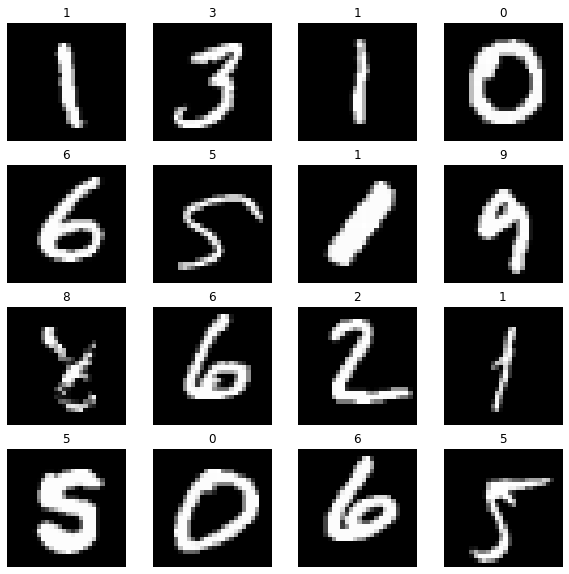

In [29]:
row, col = 4, 4
figure = plt.figure(figsize=(10,10))

for i in range(1, row*col +1):
    index = random.randint(1, len(test_data))
    image = test_data[index]
    label = test_label[index]
    figure.add_subplot(col, row, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(image, cmap='gray')